# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points

7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

In [ ]:
#KEEP ONLY THE REQUIRED LIBRARIES, REMOVE THE OTHERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier




## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

Keeping only the required libraries makes the code cleaner, easier to understand, and faster to run.

## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [ ]:
# Make sure openpyxl is installed to read xlsx files
#!pip install openpyxl

try:
    df = pd.read_excel('Approval.xlsx', engine='openpyxl')
    print("File loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: Approval.xlsx not found. Please make sure the file is in the same directory as this notebook.")


File loaded successfully!


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [ ]:
# GETTING THE DIMENSIONS OF THE ARRAY
print("Dataset shape:", df.shape)

Dataset shape: (690, 16)


In [ ]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
display(df.head(15))

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [ ]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
display(df.tail(5))

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [ ]:
# DESCRIPTIVE STATS
# <Your code here>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
# DESCRIPTIVE STATS
print(df.describe())

           Gender         Age        Debt     Married  BankCustomer  \
count  690.000000  690.000000  690.000000  690.000000    690.000000   
mean     0.695652   31.514116    4.758725    0.760870      0.763768   
std      0.460464   11.860245    4.978163    0.426862      0.425074   
min      0.000000   13.750000    0.000000    0.000000      0.000000   
25%      0.000000   22.670000    1.000000    1.000000      1.000000   
50%      1.000000   28.460000    2.750000    1.000000      1.000000   
75%      1.000000   37.707500    7.207500    1.000000      1.000000   
max      1.000000   80.250000   28.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count     690.000000    690.000000  690.000000    690.00000      690.000000   
mean        2.223406      0.523188    0.427536      2.40000        0.457971   
std         3.346513      0.499824    0.495080      4.86294        0.498592   
min         0.000000      0.000000    0.0000

## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [ ]:
# CHECK FOR MISSING VALUES
print(df.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [ ]:
# IMPUTE MISSING VALUES

for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# For non numeric data using mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])

#We imputed missing values using the mean for numeric columns and the mode for non-numeric columns. This ensures data completeness without introducing bias.

In [ ]:
print(df.isnull().sum())
display(df.head(10))

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

No, there isn’t any missing data in this dataset. We checked using `df.isnull().sum()`, and all columns showed 0 missing values.


## <span style="color:red">*Q2.  Why do we impute mean for numeric and mode for non-numeric data?*</span>

We use the mean for numeric data because it keeps the average value of the column close to the original. For non-numeric data, we use the mode (most common value) since there's no average for text or categories. This way, we can fill missing values in a way that makes sense for each type.


## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [ ]:
ohe = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
df_transformed = pd.DataFrame(index=df.index)

for col in df.columns:
    if df[col].dtype == 'object':
        enc_arr  = ohe.fit_transform(df[[col]])
        new_cols = [f"{col}_{i}" for i in range(enc_arr.shape[1])]
        enc_df   = pd.DataFrame(enc_arr, columns=new_cols, index=df.index)
        df_transformed = pd.concat([df_transformed, enc_df], axis=1)
    else:
        df_transformed[col] = df[col]

df = df_transformed
df.head(10)



,Gender,Age,Debt,Married,BankCustomer,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4,...,PriorDefault,Employed,CreditScore,DriversLicense,Citizen_0,Citizen_1,Citizen_2,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,0,0,0,0,0,...,1,1,1,0,1,0,0,202,0,1
1,0,58.67,4.460,1,1,0,0,0,0,0,...,1,1,6,0,1,0,0,43,560,1
2,0,24.50,0.500,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,280,824,1
3,1,27.83,1.540,1,1,0,0,0,0,0,...,1,1,5,1,1,0,0,100,3,1
4,1,20.17,5.625,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,120,0,1
5,1,32.08,4.000,1,1,1,0,0,0,0,...,1,0,0,1,1,0,0,360,0,1
6,1,33.17,1.040,1,1,0,0,0,0,0,...,1,0,0,1,1,0,0,164,31285,1
7,0,22.92,11.585,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,80,1349,1
8,1,54.42,0.500,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,180,314,1
9,1,42.50,4.915,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,52,1442,1


## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

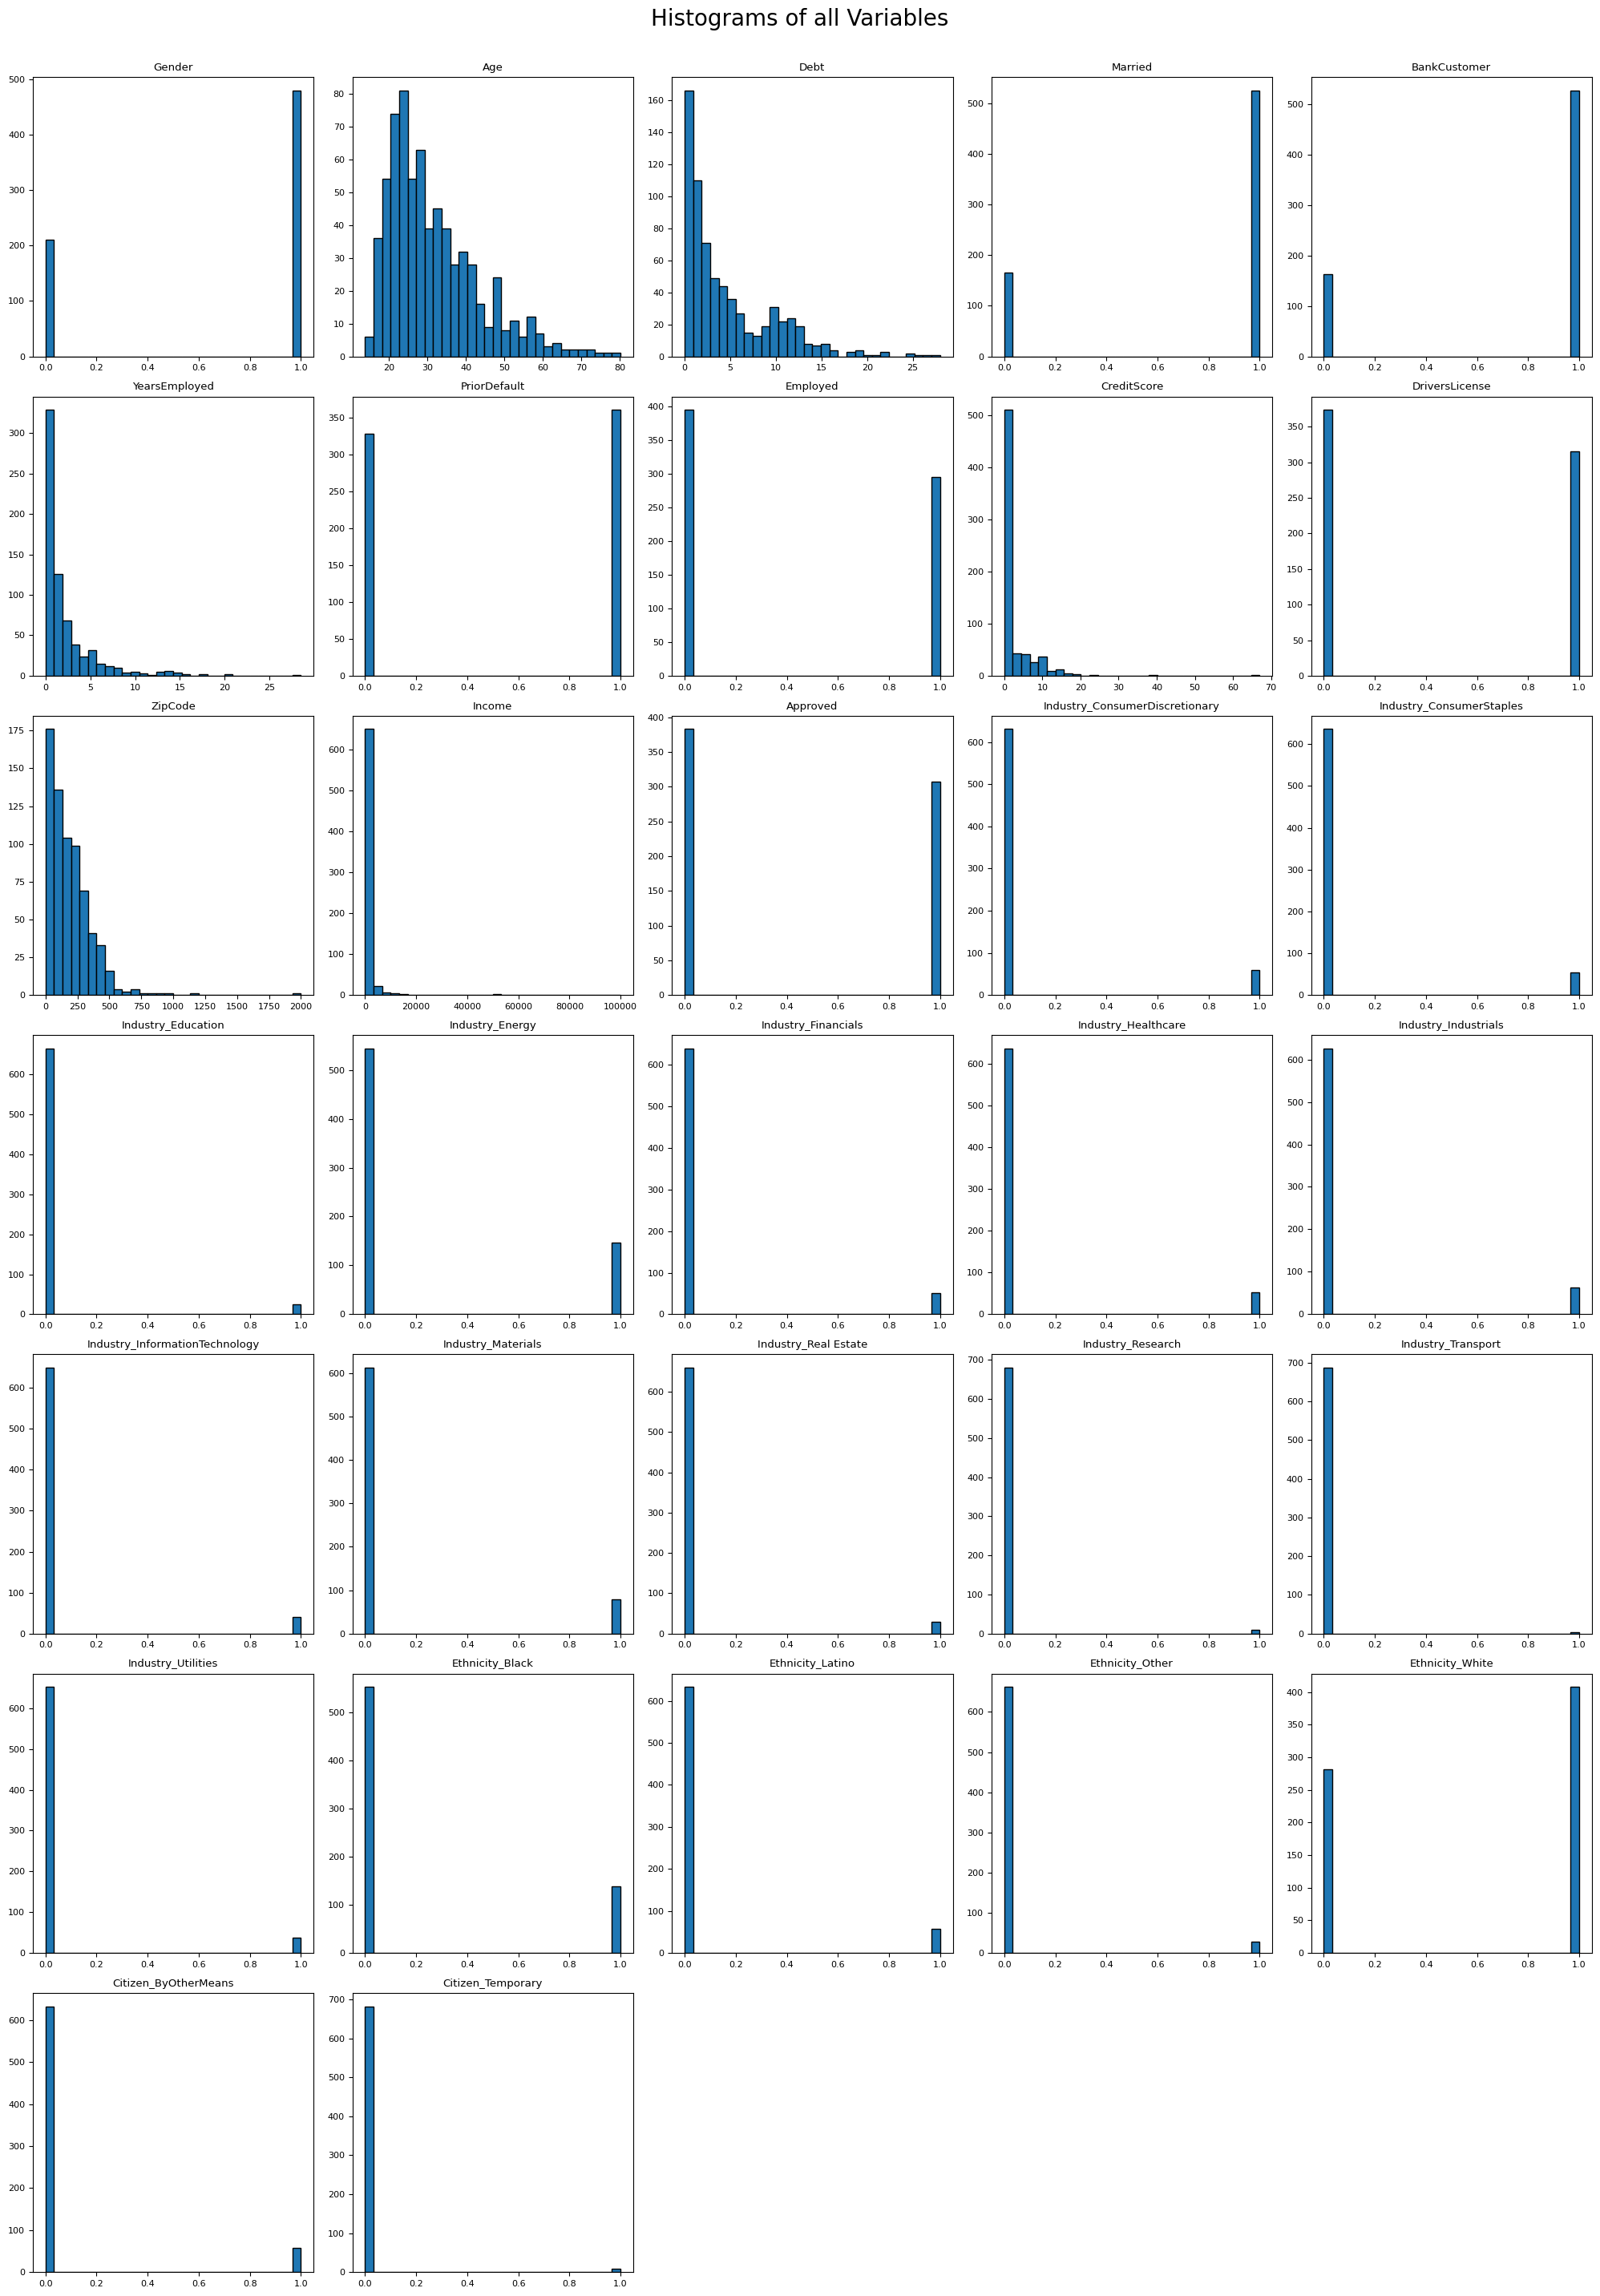

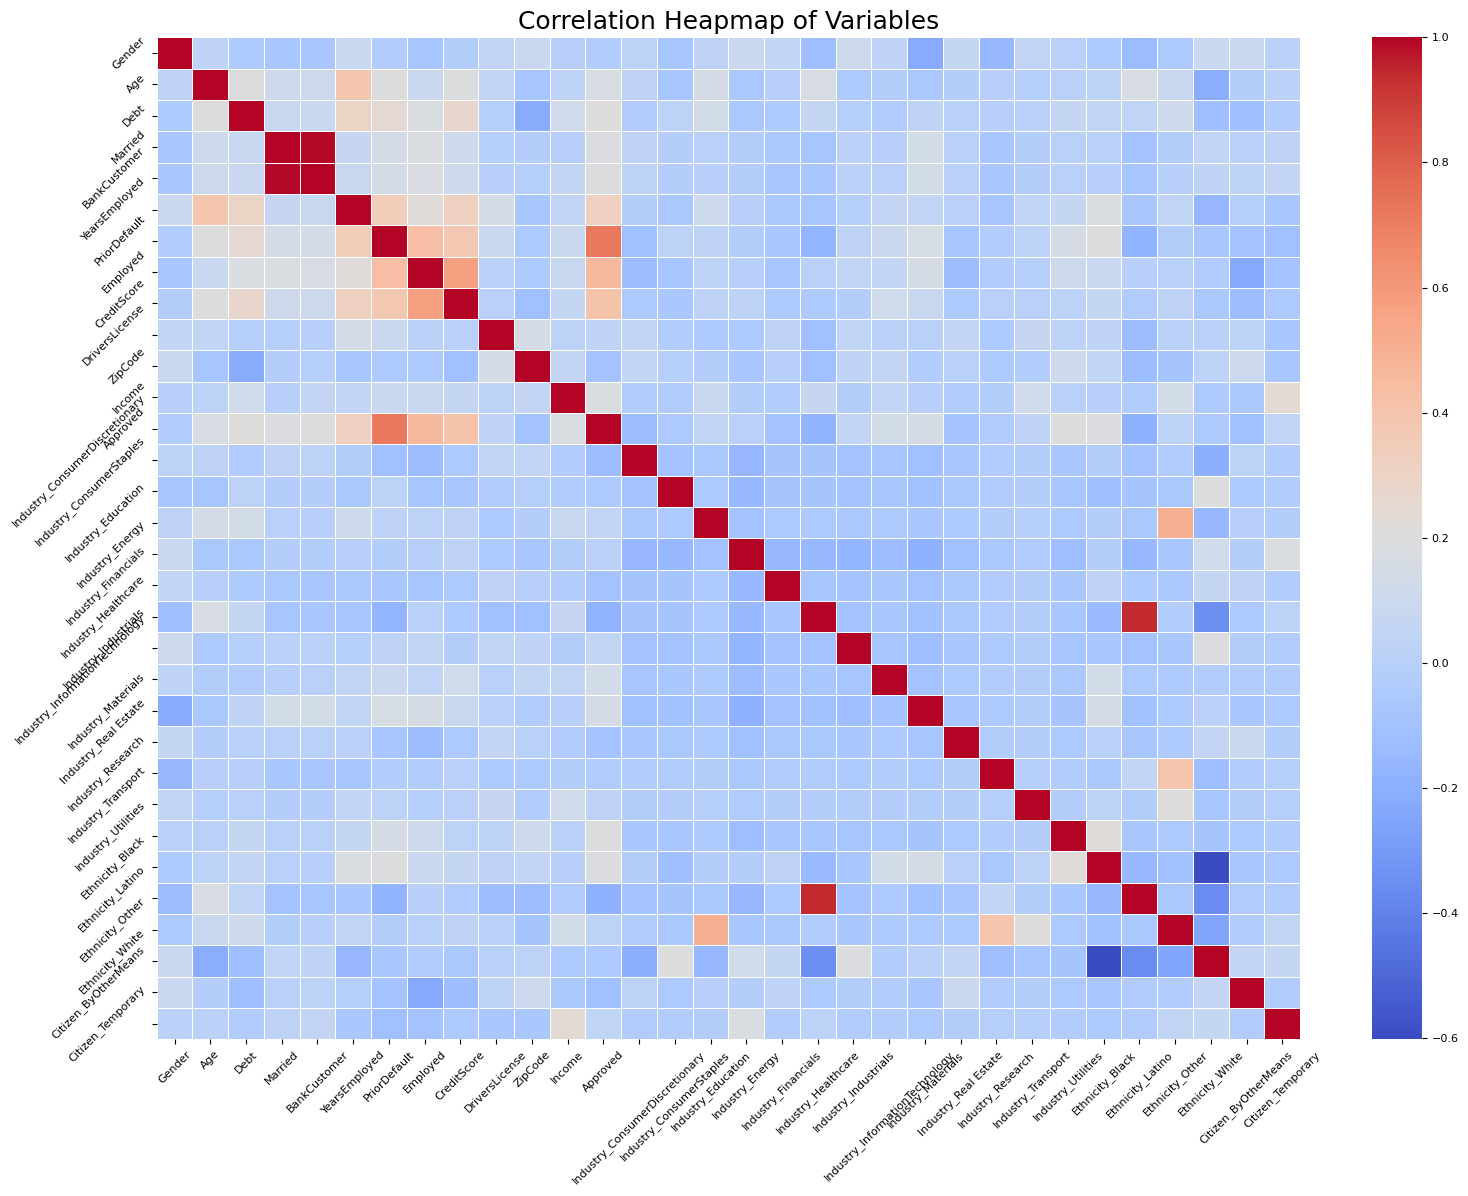

In [ ]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES

num_columns = 5
num_plots = len(data_transformed.columns)
num_rows = -(-num_plots // num_columns)

plt.figure(figsize=(20, num_rows * 4))
for idx, column in enumerate(data_transformed.columns):
  plt.subplot(num_rows, num_columns, idx + 1)
  plt.hist(data_transformed[column], bins=30, edgecolor='black')
  plt.title(column)
  plt.tight_layout()

plt.suptitle("Histograms of all Variables", fontsize=20, y=1.02)
plt.show()

# CALCULATE THE CORRELATION MATRIX
corr_matrix = data_transformed.corr()

# Decrease font size
plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heapmap of Variables", fontsize = 18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

The histograms show the distribution of each variable and how spread out the data is. Some variables, like Income and CCAvg, are right-skewed, meaning most values are on the lower end with a few very high values. Other variables, like Education or Family, show peaks, meaning they are categorical or discrete variables.



## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

The heatmap shows that features like Income, CCAvg, and Education are positively connected with loan acceptance, meaning higher values in these areas increase the likelihood of approval. It also helps identify unimportant or unrelated features like ZIP Code.

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [ ]:
# Drop unnecessary columns from features
cols_to_drop = [col for col in ['ZipCode'] if col in data_transformed.columns]
X = data_transformed.drop(columns=cols_to_drop)

# Target variable from original DataFrame
y = df['Approved']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [ ]:


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

Splitting the data allows us to train the model on the training set portion and test how well it performs on unseen data. This helps us evaluate the model’s accuracy and avoid overfitting, making sure it works well not just on known data, but also on future predictions.

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression classifier:", accuracy)

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy of logistic regression classifier: 1.0
Confusion Matrix:
[[110   0]
 [  0  97]]


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

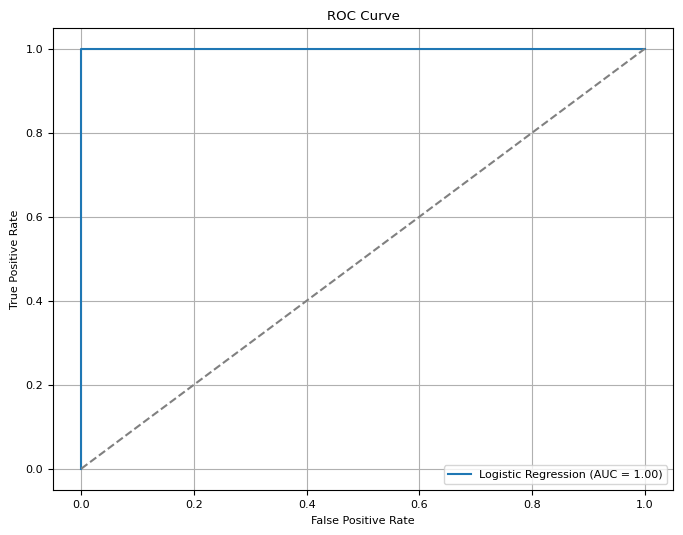

In [ ]:
# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# method to plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## <span style="color:red">*Q7. Can you code a similar model for random forest?*</span>

In [ ]:
# Import the required classifier
# Instantiate a RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Re-instantiate the RandomForestClassifier with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model again on the training data
rf.fit(X_train_scaled, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test_scaled)

# Compute and print the accuracy on test data
accuracy = rf.score(X_test_scaled, y_test)
print("Accuracy of random forest classifier: ", accuracy)

Accuracy of random forest classifier:  1.0


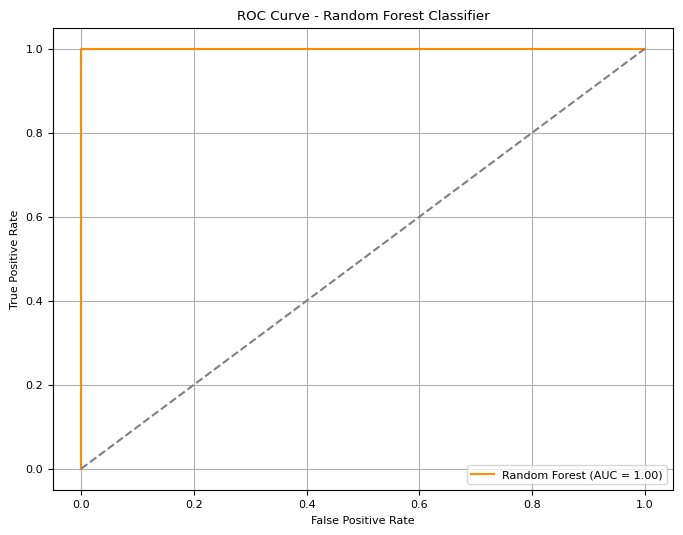

In [ ]:

# Get the probability predictions for the positive class
probs = rf.predict_proba(X_test_scaled)
preds = probs[:, 1]  # Only the probabilities for the positive class

# Compute false positive rate and true positive rate
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

# Compute the AUC score
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC Curve

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()